Saving Depression Student Dataset.csv to Depression Student Dataset.csv
Dataset Overview:
   Gender  Age  Academic Pressure  Study Satisfaction     Sleep Duration  \
0    Male   28                2.0                 4.0          7-8 hours   
1    Male   28                4.0                 5.0          5-6 hours   
2    Male   25                1.0                 3.0          5-6 hours   
3    Male   23                1.0                 4.0  More than 8 hours   
4  Female   31                1.0                 5.0  More than 8 hours   

  Dietary Habits Have you ever had suicidal thoughts ?  Study Hours  \
0       Moderate                                   Yes            9   
1        Healthy                                   Yes            7   
2      Unhealthy                                   Yes           10   
3      Unhealthy                                   Yes            7   
4        Healthy                                   Yes            4   

   Financial Stress Family

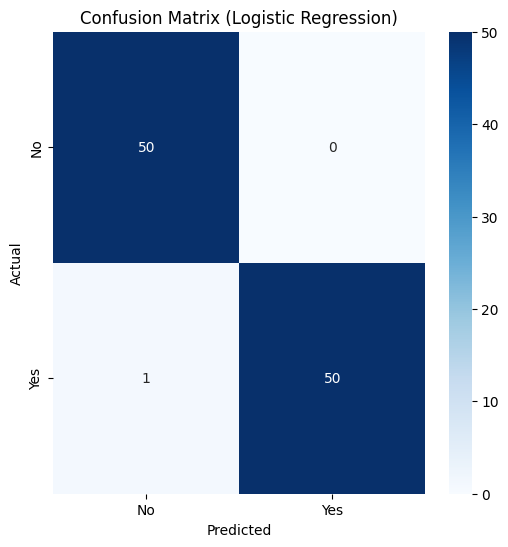

/tmp/ipython-input-3584510166.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette='viridis')


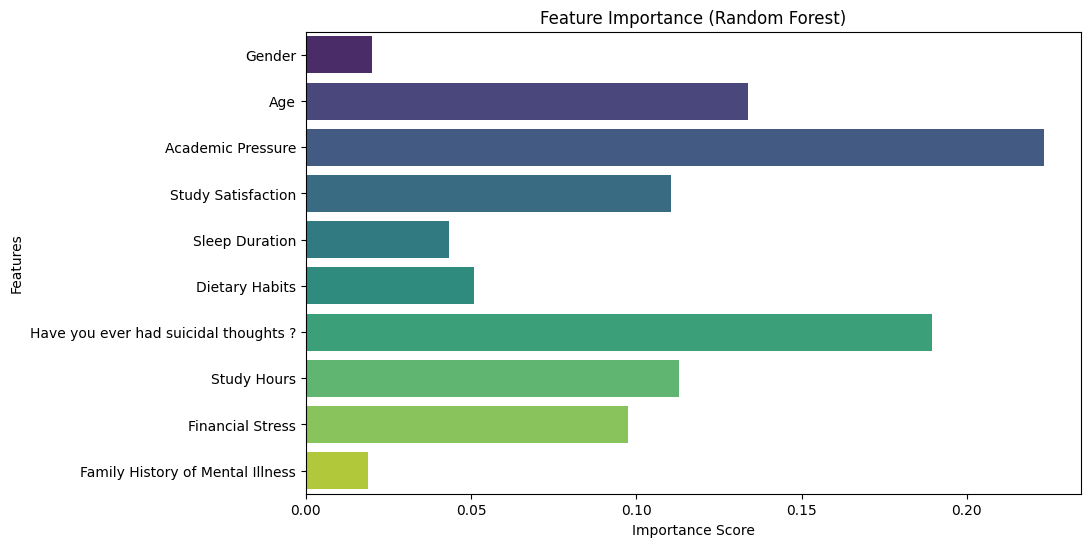

In [1]:
# ================== Importing Libraries ==================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import io

# ================== Uploading Dataset ==================
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['Depression Student Dataset.csv']))

# ================== Basic Info ==================
print("Dataset Overview:")
print(data.head())
print("\nDataset Info:")
print(data.info())

# ================== Data Preprocessing ==================
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_features = ['Gender', 'Sleep Duration', 'Dietary Habits',
                         'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

# Encode target variable
y = label_encoder.fit_transform(data['Depression'])  # Target
X = data.drop('Depression', axis=1)  # Features

# Scale numerical features
numerical_features = ['Age', 'Academic Pressure', 'Study Satisfaction', 'Study Hours', 'Financial Stress']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# ================== Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ================== Model Training ==================
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# k-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# ================== Evaluation Function ==================
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

    return accuracy, cm, report

# ================== Model Evaluation ==================
acc_lr, cm_lr, report_lr = evaluate_model(y_test, y_pred_lr, "Logistic Regression")
acc_rf, cm_rf, report_rf = evaluate_model(y_test, y_pred_rf, "Random Forest Classifier")
acc_knn, cm_knn, report_knn = evaluate_model(y_test, y_pred_knn, "k-NN Classifier")

# ================== Visualization ==================
# Confusion Matrix for Logistic Regression
plt.figure(figsize=(6, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance for Random Forest
feature_importance = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
